# Lab 3 : Working with Neural Networks

---


Total Points: **100**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs Aroof Aimen (2018csz0001@iitrpr.ac.in), Vidhya Kamakshi (2017csz0005@iitrpr.ac.in)

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.
11. **Please make a 10-minute video explaining your lab. Please provide a link to your video shared via the google drive in your notebook itslef (in a seperate text block). Follow the following naming convention: Name_rollnumber_NB.ipynb and Name_rollnumber_video.mkv respectively.** 
12. **Submissions without links for the videos, incorrect naming conventions, or incorrect folder arrangement will not be evaluated.**


In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Boston house Price Dataset for the regression problem, and for multi-class classification, we will consider Fashion-MNIST Dataset. For Boston house Price dataset details visit - https://scikit-learn.org/stable/datasets/toy_dataset.html. For Fashion-MNIST dataset you may get it using keras (see documentation) Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist


---



Section 1:  **(Total points = 50)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the house prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) *Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section*

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots. **(3 point)**
2. Perform data pre-processing operations like standardization and splitting (80:20) of data.  **(2 points)**
3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.  **( 15 points)**
4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(15 points)**
5. Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**
6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001].  **(5 points)**
7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Comment on your observations. **(3+2 = 5 points)**

Video Link: 

https://drive.google.com/file/d/1ekoqrKbpM7W_Er-pAcJXfZBUcb3adC45/view?usp=sharing


In [ ]:
#Declaration Block
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
housing = load_boston() # Loading the housing data
housing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
data = pd.DataFrame(housing["data"]) # Input data 
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
housing["feature_names"] # List of features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
target = pd.DataFrame(housing["target"]) # Ground truth house prices for each row of data
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


##1. Print avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots.


In [ ]:
print("Name ||  Average  ||  Max   ||    Min",)
for i in range(len(housing["feature_names"])):
    print(housing["feature_names"][i], " || ",data.iloc[:,i].mean(), " || ", data.iloc[:,i].max(), " || ", data.iloc[:,i].min())
print("target", " || ", housing["target"].mean(), " || ", housing["target"].max(), " || ", housing["target"].min())

Name ||  Average  ||  Max   ||    Min
CRIM  ||  3.6135235573122535  ||  88.9762  ||  0.00632
ZN  ||  11.363636363636363  ||  100.0  ||  0.0
INDUS  ||  11.136778656126504  ||  27.74  ||  0.46
CHAS  ||  0.0691699604743083  ||  1.0  ||  0.0
NOX  ||  0.5546950592885372  ||  0.871  ||  0.385
RM  ||  6.284634387351787  ||  8.78  ||  3.561
AGE  ||  68.57490118577078  ||  100.0  ||  2.9
DIS  ||  3.795042687747034  ||  12.1265  ||  1.1296
RAD  ||  9.549407114624506  ||  24.0  ||  1.0
TAX  ||  408.2371541501976  ||  711.0  ||  187.0
PTRATIO  ||  18.455533596837967  ||  22.0  ||  12.6
B  ||  356.67403162055257  ||  396.9  ||  0.32
LSTAT  ||  12.653063241106723  ||  37.97  ||  1.73
target  ||  22.532806324110677  ||  50.0  ||  5.0


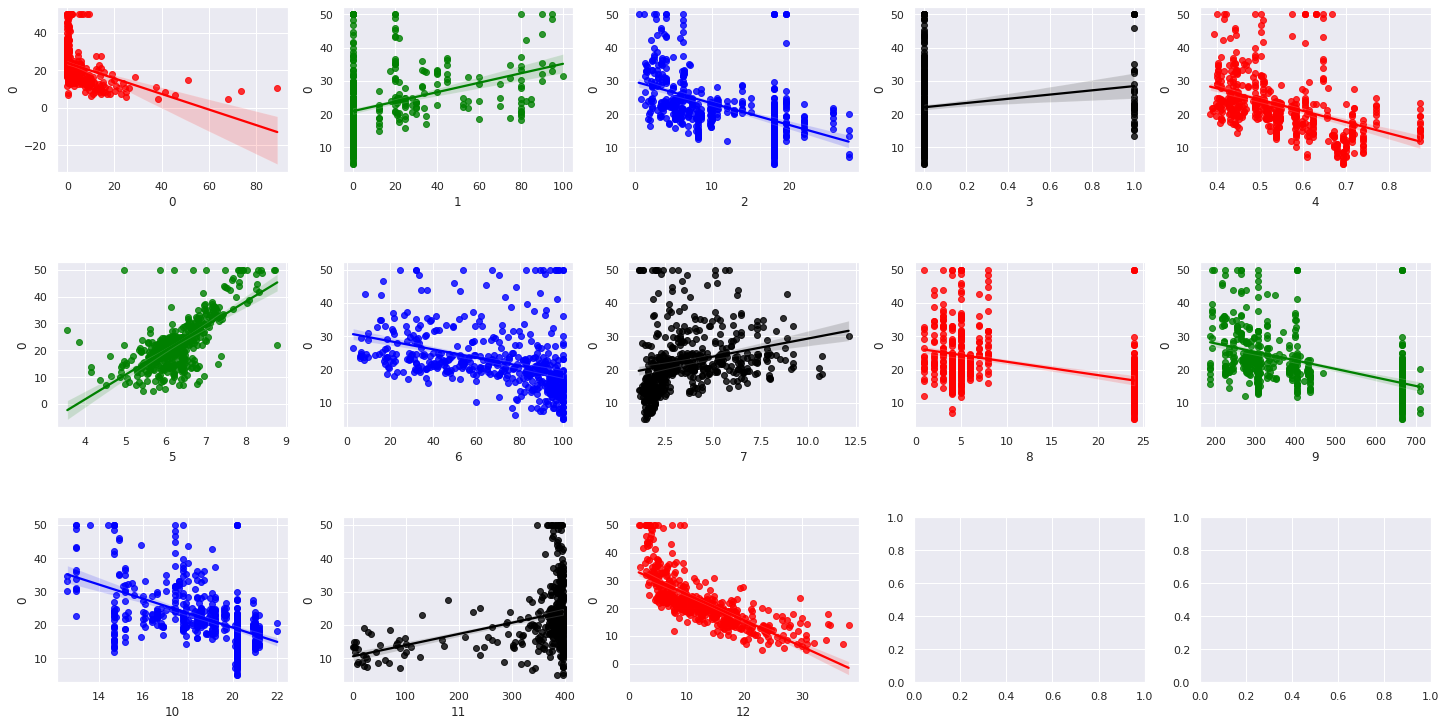

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
color = ['red','green','blue','black']

for col in data.columns:
  sns.regplot(x=data[col],y=target[0],color=color[index%4],ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

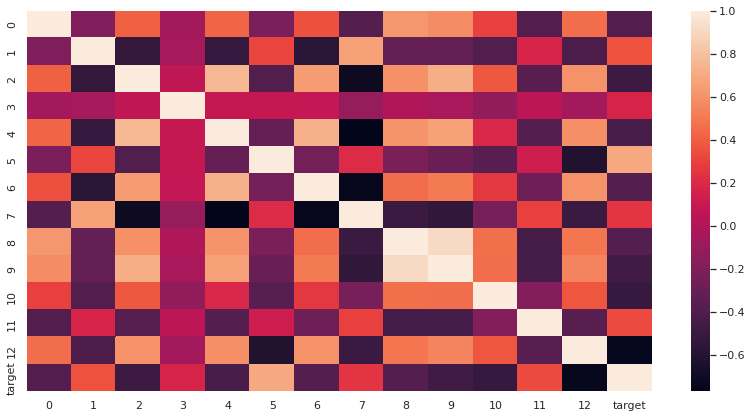

In [ ]:
temp = data.copy()
temp["target"] = target
plt.figure(figsize=(14,7))
sns.heatmap(temp.corr())

In [ ]:
# Standardize and Splitting Dataset

data = (data - data.mean(axis=0))/data.std(axis=0) 

temp = data
temp["target"] = target

data_train = temp.sample(frac=0.8)
data_train_X = data_train.iloc[:,:-1]
data_train_Y = data_train.iloc[:,-1]

data_test = temp.drop(data_train_X.index)
data_test_X = data_test.iloc[:,:-1]
data_test_Y = data_test.iloc[:,-1]


data_train_X = data_train_X.to_numpy()
data_test_X = data_test_X.to_numpy()

data_train_X = data_train_X.reshape(data_train_X.shape[0],1,data_train_X.shape[1])
data_test_X = data_test_X.reshape(data_test_X.shape[0],1,data_test_X.shape[1])
data_train_Y = data_train_Y.values.reshape(len(data_train_Y), 1,1)
data_test_Y = data_test_Y.values.reshape(len(data_test_Y), 1,1)

data_train_X.shape, data_train_Y.shape, data_test_X.shape, data_test_Y.shape

((405, 1, 13), (405, 1, 1), (101, 1, 13), (101, 1, 1))

In [ ]:
# We will perform customized forward and backward propagation


# Define Abstract class
class Layer():

    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, X):
        raise NotImplementedError

    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

# Define Fully connected Layer
class FCLayer():

    def __init__(self, input_size, output_size):

        self.weights = np.random.rand(input_size, output_size)
        self.bias = np.random.rand(1, output_size)

  # Forward Propagation
    def forward_propagation(self, X):
        self.input = X
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

  # Backward Propagation
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, np.transpose(self.weights))
        weights_error = np.dot(np.transpose(self.input), output_error)
        bias_error = output_error

        self.weights -= learning_rate*weights_error
        self.bias -= learning_rate*bias_error

        return input_error


# Activation Layer (ReLU) 
class ActivationLayer():

    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # Forward Propagation
    def forward_propagation(self, X):
        self.input = X
        self.output = self.activation(self.input)
        return self.output

    # Backward Propagation
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input)*output_error
# Define activation function and its derivative

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return (sigmoid(x))*(1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - (np.tanh(x))**2


In [ ]:
# Define Loss function (Use mean square error)

def loss(Y_hat, Y): 
    return np.mean(np.power(Y_hat - Y,2))

def loss_prime(Y_hat, Y):
    return 2*(Y_hat - Y)/len(Y)

In [ ]:
# Implement Backpropagation

In [ ]:
# Training Network

loss_graph = []
class custom_Sequential:

    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
    
    def add(self, layer):
        self.layers.append(layer)
    
    def predict(self, X):
        out = []
        for i in range(len(X)):
            y_pred = X[i]

            for layer in self.layers:
                y_pred = layer.forward_propagation(y_pred)
            out.append(y_pred)
        return out
    
    def loss_function(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def fit(self, data_X, data_Y, epochs, learning_rate):
        for i in range(epochs):
            error = 0
            for j in range(len(data_Y)):
                y_hat = data_X[j]
                for layer in self.layers:
                    y_hat = layer.forward_propagation(y_hat)
                
                error += self.loss(y_hat, data_Y[j])

                output_error = self.loss_prime(y_hat, data_Y[j])
                for layer in reversed(self.layers):
                    output_error = layer.backward_propagation(output_error, learning_rate)

            error = error/len(data_Y)
            loss_graph.append(error)
            print("Epoch: ", i,"/", epochs, " || ", "Training_Error: ", error)

In [ ]:
# Test the Model 

net = custom_Sequential()
# = data_train_X.shape[1]
#output_size = 15
net.add(FCLayer(13, 15))
net.add(ActivationLayer(sigmoid, sigmoid_prime))

net.add(FCLayer(15, 1))
#net.add(ActivationLayer(sigmoid, sigmoid_prime))


net.loss_function(loss, loss_prime)
net.fit(data_train_X, data_train_Y, epochs=1000, learning_rate=0.01)

Epoch:  0 / 1000  ||  Training_Error:  50.351235976290475
Epoch:  1 / 1000  ||  Training_Error:  28.45748823325132
Epoch:  2 / 1000  ||  Training_Error:  21.638862508432688
Epoch:  3 / 1000  ||  Training_Error:  18.28228853005884
Epoch:  4 / 1000  ||  Training_Error:  15.786978580233896
Epoch:  5 / 1000  ||  Training_Error:  13.748200651400621
Epoch:  6 / 1000  ||  Training_Error:  12.650026896798416
Epoch:  7 / 1000  ||  Training_Error:  11.435653404972054
Epoch:  8 / 1000  ||  Training_Error:  10.563672453575618
Epoch:  9 / 1000  ||  Training_Error:  9.89551977459681
Epoch:  10 / 1000  ||  Training_Error:  9.208390146941232
Epoch:  11 / 1000  ||  Training_Error:  8.84949523658692
Epoch:  12 / 1000  ||  Training_Error:  8.601710123566662
Epoch:  13 / 1000  ||  Training_Error:  8.368962279087162
Epoch:  14 / 1000  ||  Training_Error:  8.019110639289526
Epoch:  15 / 1000  ||  Training_Error:  7.6055524576390106
Epoch:  16 / 1000  ||  Training_Error:  7.203585734380599
Epoch:  17 / 1000 

In [ ]:
loss_graph1 = loss_graph

In [ ]:
net2 = custom_Sequential()
# = data_train_X.shape[1]
#output_size = 15
net2.add(FCLayer(13, 15))
net2.add(ActivationLayer(tanh, tanh_prime))

net2.add(FCLayer(15, 1))
#net.add(ActivationLayer(sigmoid, sigmoid_prime))


net2.loss_function(loss, loss_prime)
net2.fit(data_train_X, data_train_Y, epochs=1000, learning_rate=0.01)

Epoch:  0 / 1000  ||  Training_Error:  62.35478175856341
Epoch:  1 / 1000  ||  Training_Error:  31.892476086172106
Epoch:  2 / 1000  ||  Training_Error:  40.38837170144967
Epoch:  3 / 1000  ||  Training_Error:  29.40272860840565
Epoch:  4 / 1000  ||  Training_Error:  28.192509780235156
Epoch:  5 / 1000  ||  Training_Error:  22.124276630381903
Epoch:  6 / 1000  ||  Training_Error:  22.668865279236936
Epoch:  7 / 1000  ||  Training_Error:  22.373403270571774
Epoch:  8 / 1000  ||  Training_Error:  22.550951322787142
Epoch:  9 / 1000  ||  Training_Error:  21.188871211509134
Epoch:  10 / 1000  ||  Training_Error:  19.3862928438555
Epoch:  11 / 1000  ||  Training_Error:  21.36663914187289
Epoch:  12 / 1000  ||  Training_Error:  21.092469758096133
Epoch:  13 / 1000  ||  Training_Error:  19.437766343514173
Epoch:  14 / 1000  ||  Training_Error:  18.733183108072257
Epoch:  15 / 1000  ||  Training_Error:  18.28957366694676
Epoch:  16 / 1000  ||  Training_Error:  17.59630996203235
Epoch:  17 / 10

In [ ]:
loss_graph2 = loss_graph

##SGD+Sigmoid

Text(0, 0.5, 'Error')

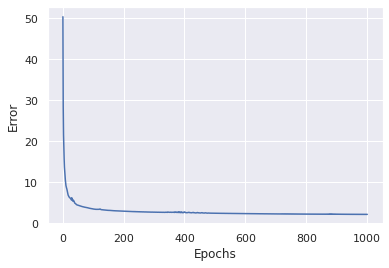

In [ ]:
# Plots

##SGD ##Sigmoid
sns.lineplot(x=[i for i in range(1,1001)],y=loss_graph)
plt.xlabel('Epochs')
plt.ylabel('Error')

In [ ]:
# Challenges and Observations
y_pred = net.predict(data_test_X)
error = loss(y_pred, data_test_Y)
error/len(data_test_Y)

0.14443431551999952

Text(0, 0.5, 'Pred Data')

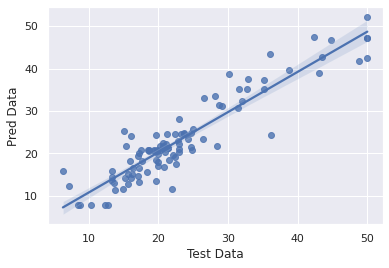

In [ ]:
sns.regplot(x=data_test_Y, y=y_pred)
plt.xlabel('Test Data')
plt.ylabel('Pred Data')

##SGD+Tanh

Text(0, 0.5, 'Error')

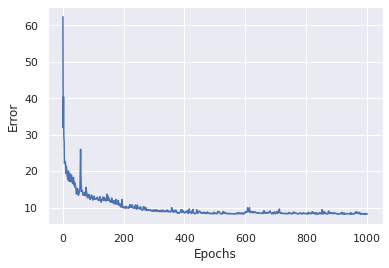

In [ ]:
sns.lineplot(x=[i for i in range(1,1001)],y=loss_graph2)
plt.xlabel('Epochs')
plt.ylabel('Error')

In [ ]:
y_pred = net2.predict(data_test_X)
error = loss(y_pred, data_test_Y)
error/len(data_test_Y)

0.2582973135950837

Text(0, 0.5, 'Pred Data')

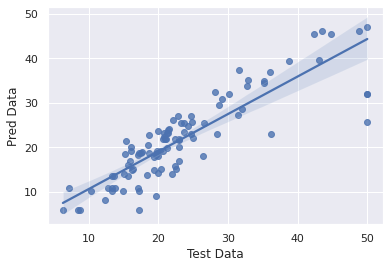

In [ ]:
sns.regplot(x=data_test_Y, y=y_pred)
plt.xlabel('Test Data')
plt.ylabel('Pred Data')

###SGD Model with sigmoid activation works good

In [ ]:
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.0001]
each_error = []
for lr in learning_rates[1:]:
    net3 = custom_Sequential()

    net3.add(FCLayer(13, 15))
    net3.add(ActivationLayer(sigmoid, sigmoid_prime))

    net3.add(FCLayer(15, 1))

    net3.loss_function(loss, loss_prime)
    net3.fit(data_train_X, data_train_Y, epochs=500, learning_rate=lr)

    y_pred = net3.predict(data_test_X)
    error = loss(y_pred, data_test_Y)
    error = error/len(data_test_Y)
    each_error.append(error)

Epoch:  0 / 500  ||  Training_Error:  178.38843487393416
Epoch:  1 / 500  ||  Training_Error:  168.86340010866533
Epoch:  2 / 500  ||  Training_Error:  115.17051015511676
Epoch:  3 / 500  ||  Training_Error:  109.23002236462423
Epoch:  4 / 500  ||  Training_Error:  206.5019662065726
Epoch:  5 / 500  ||  Training_Error:  198.85266564021998
Epoch:  6 / 500  ||  Training_Error:  281.90447800304213
Epoch:  7 / 500  ||  Training_Error:  16639.432148475284
Epoch:  8 / 500  ||  Training_Error:  750.0543292019277


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in exp


Epoch:  9 / 500  ||  Training_Error:  250.35985923957844
Epoch:  10 / 500  ||  Training_Error:  153.14016419804992
Epoch:  11 / 500  ||  Training_Error:  156.2724934879142
Epoch:  12 / 500  ||  Training_Error:  160.3468252815537
Epoch:  13 / 500  ||  Training_Error:  161.83085716387006
Epoch:  14 / 500  ||  Training_Error:  162.4106056424992
Epoch:  15 / 500  ||  Training_Error:  158.389926379658
Epoch:  16 / 500  ||  Training_Error:  160.30792686747827
Epoch:  17 / 500  ||  Training_Error:  158.9736508540212
Epoch:  18 / 500  ||  Training_Error:  150.8054020253126
Epoch:  19 / 500  ||  Training_Error:  156.29802488892895
Epoch:  20 / 500  ||  Training_Error:  142.00482287051176
Epoch:  21 / 500  ||  Training_Error:  135.2092620090421
Epoch:  22 / 500  ||  Training_Error:  135.0951817450509
Epoch:  23 / 500  ||  Training_Error:  132.90517373396443
Epoch:  24 / 500  ||  Training_Error:  147.67992027409613
Epoch:  25 / 500  ||  Training_Error:  136.4094056454767
Epoch:  26 / 500  ||  Tra

In [ ]:
len(loss_graph)

2000

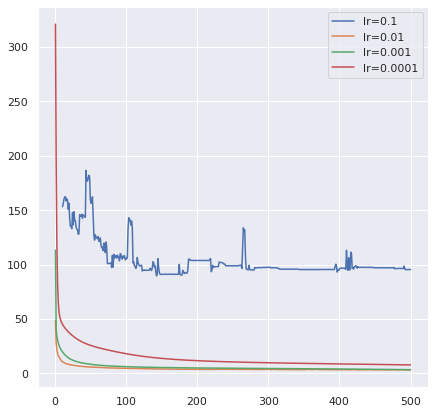

In [ ]:
plt.figure(figsize=(7,7))
sns.lineplot(x=[i for i in range(11,501)],y=loss_graph[10:500], legend='brief', label = 'lr=0.1')
sns.lineplot(x=[i for i in range(1,501)],y=loss_graph[500:1000], legend='brief', label = 'lr=0.01')
sns.lineplot(x=[i for i in range(1,501)],y=loss_graph[1000:1500], legend='brief', label = 'lr=0.001')
sns.lineplot(x=[i for i in range(1,501)],y=loss_graph[1500:2000], legend='brief', label = 'lr=0.0001')

In [ ]:
for i in range(4):
    print(learning_rates[i+1]," || ", each_error[i])

0.1  ||  0.6233700668489389
0.01  ||  0.11356015385646805
0.001  ||  0.09371169859450804
0.0001  ||  0.0932073950758928


The Best Learning Rate is 0.01. And 0.001 is also a good Learning Rate


---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Fashion-MNIST using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each fashion class. **(5 points)**

2. Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment. **(5 points)**

3. Implememnt the 2D convolution function using a kernel size of 3x3. Use the [sobel kernel](https://en.wikipedia.org/wiki/Sobel_operator) and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as $F_m = \sqrt(x^2 + y^2)$**(10 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(5 points)**
*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

3. Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. **(5 points)**

4. Compile and train your model with four different optimizers viz. SGD
RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**


In [ ]:
#import Fashion MNIST dataset
import keras
from keras.datasets import fashion_mnist

In [ ]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data() #load dataset
#fashion_data
train_X.shape, train_Y.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

##1. Display one randomly selected image from each fashion class

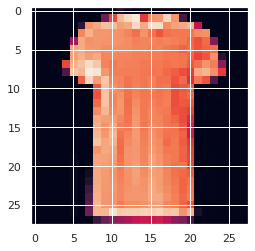

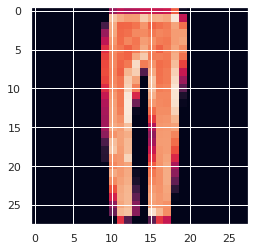

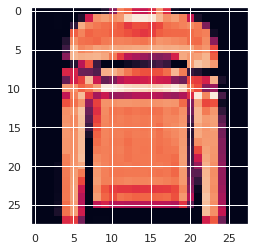

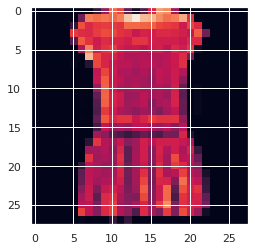

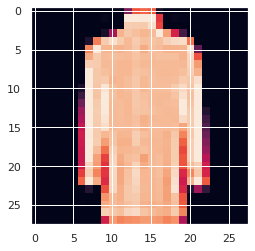

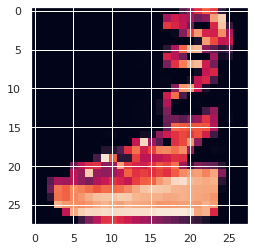

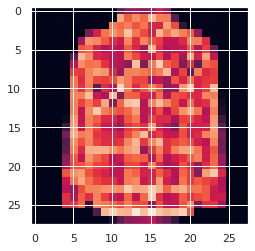

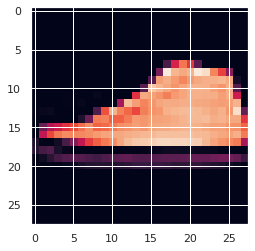

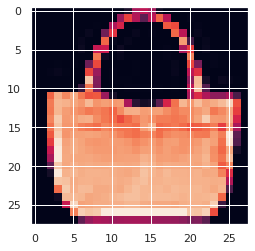

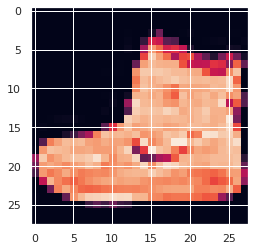

In [ ]:
#Dataset Exploration

image_classes = {i:[] for i in range(0,10)}

image_label = list(train_Y)
for i in range(len(image_label)):
    image_classes[image_label[i]].append(i)

random_image = []
for i in range(0,10):
    random_index = np.random.randint(0,len(image_classes)-1,size=1)[0]
    image = train_X[image_classes[i][random_index]]
    random_image.append(image)
    plt.imshow(image)
    plt.show()

##2. Plot the distribution of number of images in each fashion class. Is the distribution uniform?

Ans: Yes. It's Uniform

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


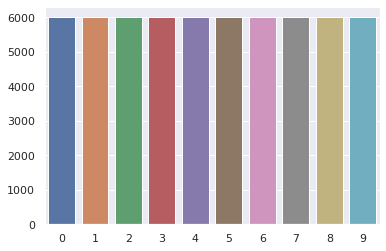

In [ ]:
x = [i for i in range(0,10)]
y = [len(i) for i in list(image_classes.values())]

sns.barplot(x,y)

##3. Sobel Kernal

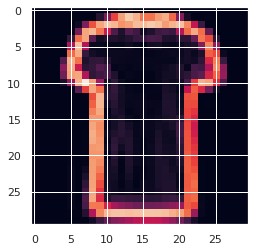

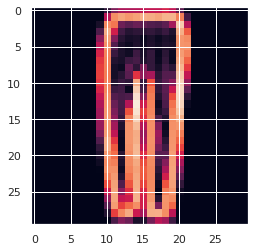

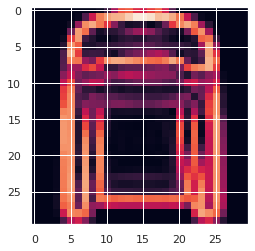

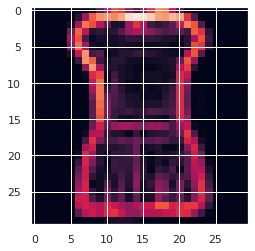

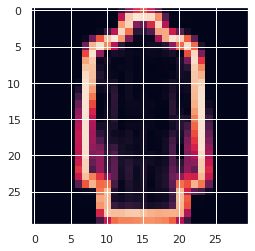

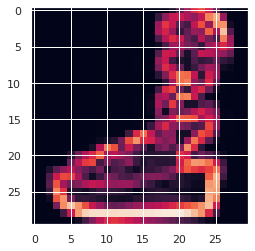

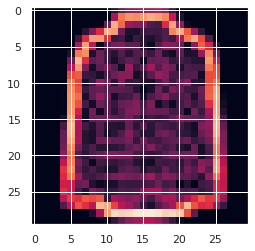

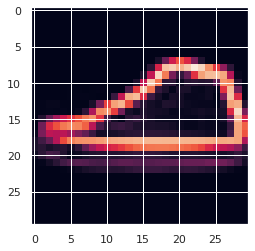

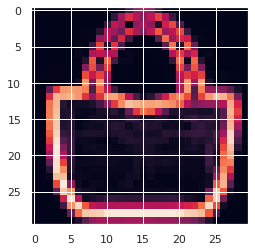

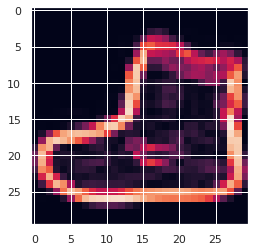

In [ ]:
from scipy import signal

Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

for i in range(0,10):
    image = random_image[i]
    
    Ix = signal.convolve2d(image, Kx)
    Iy = signal.convolve2d(image, Ky)
    
    I = np.sqrt(np.power(Ix,2) + np.power(Iy,2))
    plt.imshow(I)
    plt.show()

##4. Model Structure

In [ ]:
from keras import layers
from keras.models import Sequential
import tensorflow as tf

In [ ]:
# Model Structure 
def cnn_model():

    model = Sequential([
                        layers.Conv2D(32, 3, padding="same", activation='relu', input_shape=(28,28,1)),
                        layers.MaxPooling2D(pool_size=(2,2)),
                        layers.Conv2D(64, 3, padding="same", activation='relu'),
                        layers.MaxPooling2D(pool_size=(2,2)),
                        layers.Dropout(0.25),
                        layers.Flatten(),
                        layers.Dense(256, activation='relu'),
                        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Implement the loss (cross-entropy)


In [ ]:
training_loss = []

##1.SGD

In [ ]:
# Compile and fit the model

sgd = tf.keras.optimizers.SGD(lr = 0.01)
sgd_model = cnn_model()
sgd_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=sgd)

sumry = sgd_model.fit(train_X, train_Y, batch_size=64, epochs=10, validation_data=(test_X, test_Y))
training_loss.append(sumry.history)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


938/938 [==============================] - 8s 8ms/step - loss: 2.3604 - accuracy: 0.2516 - val_loss: 1.0977 - val_accuracy: 0.6108
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.7402 - accuracy: 0.7196 - val_loss: 0.5256 - val_accuracy: 0.8046
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.5165 - accuracy: 0.8066 - val_loss: 0.4846 - val_accuracy: 0.8159
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.4604 - accuracy: 0.8277 - val_loss: 0.4354 - val_accuracy: 0.8417
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.4116 - accuracy: 0.8482 - val_loss: 0.4153 - val_accuracy: 0.8404
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3710 - accuracy: 0.8605 - val_loss: 0.3694 - val_accuracy: 0.8630
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3478 - accuracy: 0.8692 - val_loss: 0.3695 - val_accuracy: 0.8626
Epoch 8/10
938/93

##2.RMSProp

In [ ]:
rmsprop = tf.keras.optimizers.RMSprop(lr = 0.01)
rmsprop_model = cnn_model()
rmsprop_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=rmsprop)

sumry2 = rmsprop_model.fit(train_X, train_Y, batch_size=64, epochs=10, validation_data=(test_X, test_Y))
training_loss.append(sumry2.history)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


938/938 [==============================] - 10s 9ms/step - loss: 4.3374 - accuracy: 0.7303 - val_loss: 0.6107 - val_accuracy: 0.7731
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.7234 - accuracy: 0.7746 - val_loss: 0.5676 - val_accuracy: 0.7905
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 0.7435 - accuracy: 0.7758 - val_loss: 0.7139 - val_accuracy: 0.7792
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.7301 - accuracy: 0.7678 - val_loss: 0.6281 - val_accuracy: 0.7657
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 0.7280 - accuracy: 0.7703 - val_loss: 3.3607 - val_accuracy: 0.7738
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.9193 - accuracy: 0.7890 - val_loss: 0.8587 - val_accuracy: 0.7239
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.6499 - accuracy: 0.7953 - val_loss: 0.7239 - val_accuracy: 0.7539
Epoch 8/10
938/9

##3.Adam

In [ ]:
adam = tf.keras.optimizers.Adam(lr = 0.01)
adam_model = cnn_model()
adam_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=adam)

sumry3 = adam_model.fit(train_X, train_Y, batch_size=64, epochs=10, validation_data=(test_X, test_Y))
training_loss.append(sumry3.history)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


938/938 [==============================] - 8s 8ms/step - loss: 1.5586 - accuracy: 0.7362 - val_loss: 0.5046 - val_accuracy: 0.8062
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.5513 - accuracy: 0.7945 - val_loss: 0.6125 - val_accuracy: 0.7624
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.5808 - accuracy: 0.7807 - val_loss: 0.5259 - val_accuracy: 0.7913
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.5295 - accuracy: 0.7993 - val_loss: 0.4663 - val_accuracy: 0.8249
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.5359 - accuracy: 0.7972 - val_loss: 0.4666 - val_accuracy: 0.8259
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.5981 - accuracy: 0.7735 - val_loss: 0.4545 - val_accuracy: 0.8280
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.5167 - accuracy: 0.8071 - val_loss: 0.4796 - val_accuracy: 0.8242
Epoch 8/10
938/93

##4.Adagrad

In [ ]:
adagrad = tf.keras.optimizers.Adagrad(lr = 0.01)
adagrad_model = cnn_model()
adagrad_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=adagrad)

sumry3 = adagrad_model.fit(train_X, train_Y, batch_size=64, epochs=10, validation_data=(test_X, test_Y))
training_loss.append(sumry3.history)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


938/938 [==============================] - 8s 8ms/step - loss: 0.8031 - accuracy: 0.8204 - val_loss: 0.3795 - val_accuracy: 0.8564
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3511 - accuracy: 0.8720 - val_loss: 0.3329 - val_accuracy: 0.8798
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3102 - accuracy: 0.8874 - val_loss: 0.3002 - val_accuracy: 0.8905
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2847 - accuracy: 0.8952 - val_loss: 0.2964 - val_accuracy: 0.8907
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2642 - accuracy: 0.9042 - val_loss: 0.2907 - val_accuracy: 0.8920
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2504 - accuracy: 0.9072 - val_loss: 0.2712 - val_accuracy: 0.9001
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2378 - accuracy: 0.9121 - val_loss: 0.2736 - val_accuracy: 0.8997
Epoch 8/10
938/93

In [ ]:
#training_loss.pop()
len(training_loss)

4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Error')

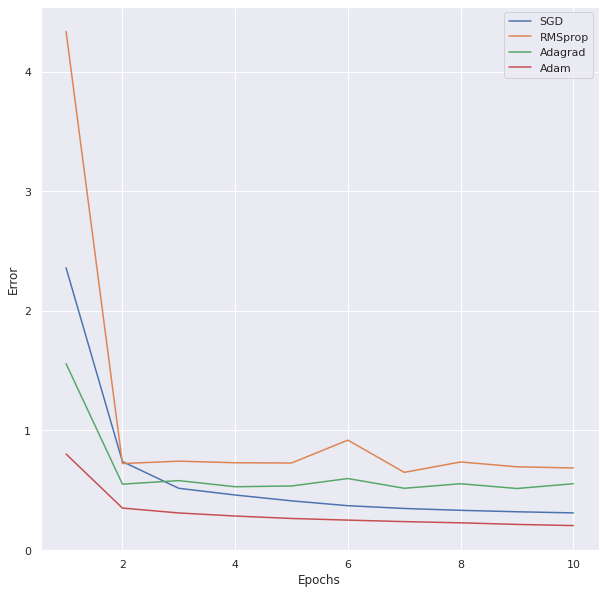

In [ ]:
# Test the model

optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
j=0
plt.figure(figsize=(10,10))

for i in training_loss:
    x = [i for i in range(1,11)]
    y = i['loss']
    sns.lineplot(x,y,legend='brief',label=optimizers[j])
    j += 1

plt.xlabel('Epochs')
plt.ylabel('Error')

**Adam is good**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Error')

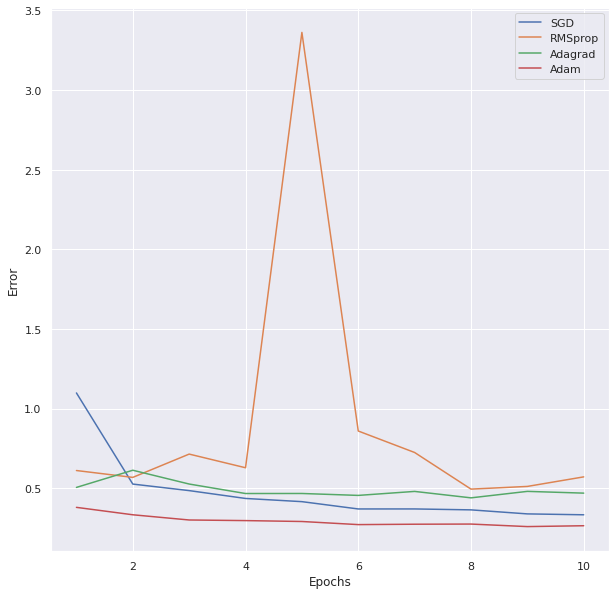

In [ ]:
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
j=0
plt.figure(figsize=(10,10))

for i in training_loss:
    x = [i for i in range(1,11)]
    y = i['val_loss']
    sns.lineplot(x,y,legend='brief',label=optimizers[j])
    j += 1

plt.xlabel('Epochs')
plt.ylabel('Error')

##Different Models

In [ ]:
hyp = []

In [ ]:
model1 = Sequential([
                        layers.Conv2D(32, 3, padding="same", activation='relu', input_shape=(28,28,1)),
                        layers.MaxPooling2D(pool_size=(2,2)),
                        layers.Conv2D(64, 3, padding="same", activation='relu'),
                        layers.MaxPooling2D(pool_size=(2,2)),
                        layers.Dropout(0.25),
                        layers.Flatten(),
                        layers.Dense(256, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(10, activation='softmax')
    ])

model1.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(lr=0.01))
diff_smry1 = adam_model.fit(train_X, train_Y, batch_size=64, epochs=10, validation_data=(test_X, test_Y))
hyp.append(diff_smry1.history)

Epoch 1/10
  8/938 [..............................] - ETA: 7s - loss: 0.2215 - accuracy: 0.9297 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


938/938 [==============================] - 8s 9ms/step - loss: 0.2396 - accuracy: 0.9093 - val_loss: 0.2933 - val_accuracy: 0.8939
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2349 - accuracy: 0.9103 - val_loss: 0.3135 - val_accuracy: 0.8836
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2294 - accuracy: 0.9116 - val_loss: 0.2984 - val_accuracy: 0.8932
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2254 - accuracy: 0.9140 - val_loss: 0.2907 - val_accuracy: 0.8940
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2218 - accuracy: 0.9150 - val_loss: 0.3078 - val_accuracy: 0.8934
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2169 - accuracy: 0.9178 - val_loss: 0.2966 - val_accuracy: 0.8929
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2137 - accuracy: 0.9181 - val_loss: 0.2946 - val_accuracy: 0.8954
Epoch 8/10
938/93

In [ ]:
model2 = Sequential([
                        layers.Conv2D(32, 3, padding="same", activation='relu', input_shape=(28,28,1)),
                        layers.MaxPooling2D(pool_size=(2,2)),
                        layers.Conv2D(64, 3, padding="same", activation='relu'),
                        layers.MaxPooling2D(pool_size=(2,2)),
                        layers.Dropout(0.25),
                        layers.Flatten(),
                        layers.Dense(256, activation='relu'),
                        layers.Dense(100, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(10, activation='softmax')
    ])

model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(lr=0.01))
diff_smry2 = adam_model.fit(train_X, train_Y, batch_size=64, epochs=10, validation_data=(test_X, test_Y))
hyp.append(diff_smry2.history)

Epoch 1/10
  8/938 [..............................] - ETA: 7s - loss: 0.1826 - accuracy: 0.9219 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


938/938 [==============================] - 8s 8ms/step - loss: 0.1991 - accuracy: 0.9240 - val_loss: 0.3026 - val_accuracy: 0.8919
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.1955 - accuracy: 0.9248 - val_loss: 0.2944 - val_accuracy: 0.8946
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1928 - accuracy: 0.9264 - val_loss: 0.2974 - val_accuracy: 0.8979
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1889 - accuracy: 0.9268 - val_loss: 0.3047 - val_accuracy: 0.8935
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1865 - accuracy: 0.9284 - val_loss: 0.2857 - val_accuracy: 0.9003
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1825 - accuracy: 0.9295 - val_loss: 0.2950 - val_accuracy: 0.8974
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1759 - accuracy: 0.9321 - val_loss: 0.3005 - val_accuracy: 0.8985
Epoch 8/10
938/93

In [ ]:
model3 = Sequential([
                        layers.Conv2D(32, 3, padding="same", activation='relu', input_shape=(28,28,1)),
                        layers.MaxPooling2D(pool_size=(2,2)),
                        layers.Dropout(0.5),
                        layers.Conv2D(64, 3, padding="same", activation='relu'),
                        layers.MaxPooling2D(pool_size=(2,2)),
                        layers.Dropout(0.25),
                        layers.Flatten(),
                        layers.Dense(256, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(10, activation='softmax')
    ])

model3.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(lr=0.01))
diff_smry3 = adam_model.fit(train_X, train_Y, batch_size=64, epochs=10, validation_data=(test_X, test_Y))
hyp.append(diff_smry3.history)

Epoch 1/10
  8/938 [..............................] - ETA: 7s - loss: 0.1462 - accuracy: 0.9316 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


938/938 [==============================] - 8s 8ms/step - loss: 0.1661 - accuracy: 0.9358 - val_loss: 0.3096 - val_accuracy: 0.8980
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1635 - accuracy: 0.9373 - val_loss: 0.3074 - val_accuracy: 0.8957
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1588 - accuracy: 0.9390 - val_loss: 0.3115 - val_accuracy: 0.8961
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1562 - accuracy: 0.9401 - val_loss: 0.3274 - val_accuracy: 0.8957
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1523 - accuracy: 0.9414 - val_loss: 0.3316 - val_accuracy: 0.8955
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1494 - accuracy: 0.9422 - val_loss: 0.3113 - val_accuracy: 0.9013
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1480 - accuracy: 0.9422 - val_loss: 0.3238 - val_accuracy: 0.8982
Epoch 8/10
938/93

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Error')

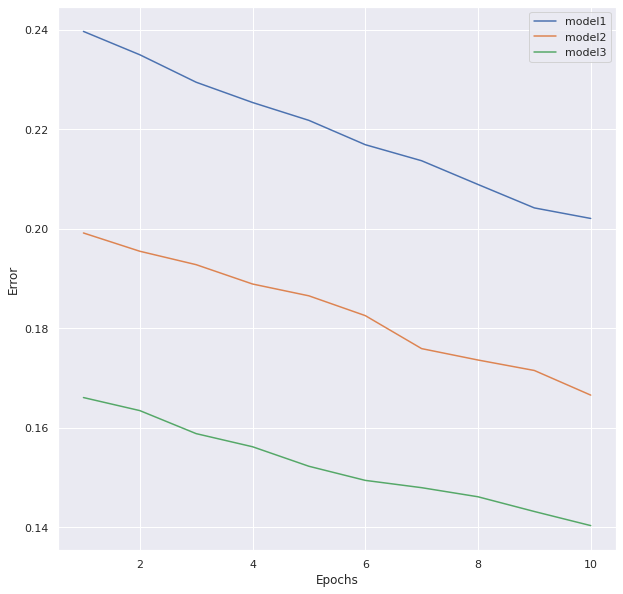

In [ ]:
# Challenges and observations

optimizers = ['model1', 'model2', 'model3']
j=0
plt.figure(figsize=(10,10))

for i in hyp:
    x = [i for i in range(1,11)]
    y = i['loss']
    sns.lineplot(x,y,legend='brief',label=optimizers[j])
    j += 1

plt.xlabel('Epochs')
plt.ylabel('Error')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Error')

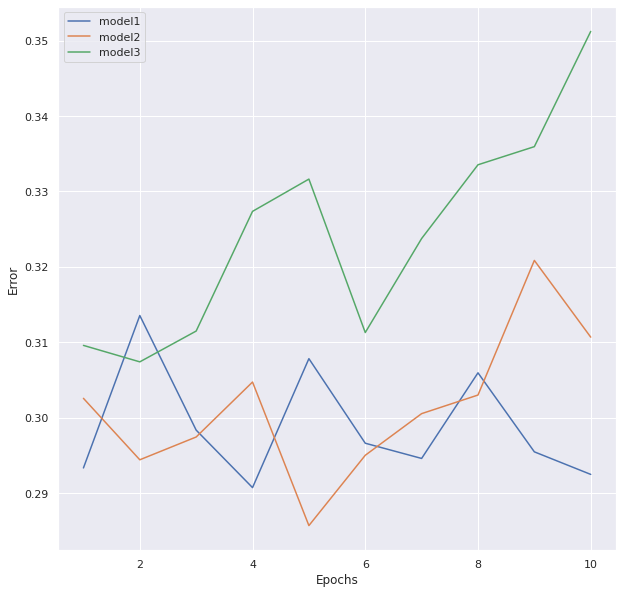

In [ ]:
optimizers = ['model1', 'model2', 'model3']
j=0
plt.figure(figsize=(10,10))

for i in hyp:
    x = [i for i in range(1,11)]
    y = i['val_loss']
    sns.lineplot(x,y,legend='brief',label=optimizers[j])
    j += 1

plt.xlabel('Epochs')
plt.ylabel('Error')